In [2]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stand_data_df = pd.read_csv(r'D:\2024\data science portfolio\Custoemr behavior analysis Oreilly\data\chap1-stand_data.csv')

<Axes: xlabel='temps', ylabel='icecream_sales'>

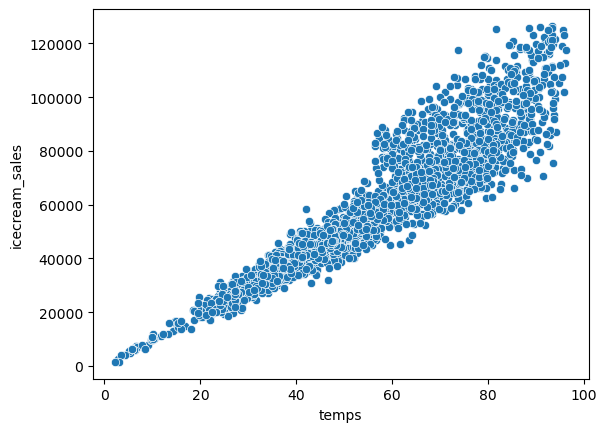

In [4]:
#Plotting ice-cream sales against temperatures
sns.scatterplot(x='temps', y='icecream_sales', data=stand_data_df)

In [5]:
print(ols("icecream_sales ~ temps", data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:31:08   Log-Likelihood:                -25183.
No. Observations:                2400   AIC:                         5.037e+04
Df Residuals:                    2398   BIC:                         5.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6169.8442    531.506    -11.608      0.0

The coefficient section, for estimated intercept [average icecream sales where tempreture is = 0] is -6169 , and it is not sensible.
it also tells us the estimated coefficient for the tempreture is 6169, which means each additional degree of tempreture is expected to increase the sales by 6169$. 

however, inorder to use this statistics to make decision we should also consider other aspects. what if we sell in October? 
did we consider that in summer , despite the temrature, kids are in holiday. 
and in October, considering the right tempreture to sell icecream, our sales numbers shows somethnig else!
The regression model, did a great job. however, part of the reason for high sales of icecream [selling it to kids] is not counted while making the model. 
what if in the cold weather kids are not at school? how is the sales prediciton of our model?
or how is our sales, in a hot summer day, but when kids are at school? 

inorder to reasses this question, we added another variable, IcedcoffeeSales which is not correlated with summer month.

In [9]:
ols("icecream_sales ~ temps + summer_months", data=stand_data_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         icecream_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.016e+04
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:34:03   Log-Likelihood:                -24225.
No. Observations:                2400   AIC:                         4.846e+04
Df Residuals:                    2397   BIC:                         4.847e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.0690    374.401     -0.019      0.985    -741.253     727.115
temps          1001.4818      6.822    146.797      0.000     988.104    1014.860
summer_months  1.956e+04    361.393     54.115      0.000    1.88e+04    2.03e+04
==============================================================================
Omnibus:                       65.484   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.710
Skew:                           0.053   Prob(JB):                     1.54e-34
Kurtosis:                       4.243   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
stand_data_df.head(5)

,icecream_sales,iced_coffee_sales,summer_months,temps
0,25649.780754,28592.182276,0,28.593141
1,32694.928923,37152.842623,0,37.130641
2,26467.798121,24074.193453,0,24.111898
3,43438.793949,49169.465998,0,49.218075
4,52452.628396,47249.399498,0,47.257661


In [10]:
print(ols("icecream_sales ~ temps + summer_months + iced_coffee_sales", 
          data=stand_data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         icecream_sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:38:28   Log-Likelihood:                -24225.
No. Observations:                2400   AIC:                         4.846e+04
Df Residuals:                    2396   BIC:                         4.848e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -15.8271    374.58

The truth behind the data is that when it is hot, people are more likeky to buy icedcoffee
on hot days, people are more likely to buy more icecream 
but buying icedcoffee, doesnt make customers any more or less to buy icecream
Summer months are not also a feature correlated to icedcoffee sales because kids are not a significant factor in the demand for icedcoffee

<Axes: xlabel='iced_coffee_sales', ylabel='icecream_sales'>

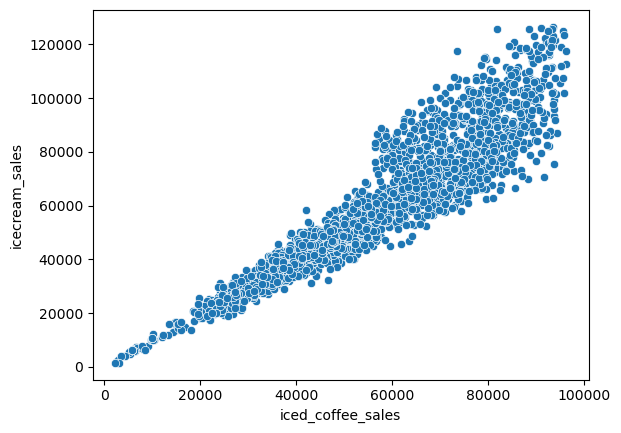

In [11]:
sns.scatterplot(x='iced_coffee_sales', y='icecream_sales', data=stand_data_df)